# 실습 전 설정

In [45]:
import sys
assert sys.version_info>=(3, 5)

import sklearn
assert sklearn.__version__>="0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID="decision_trees"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path=os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension,dpi=resolution)

# 성능 측정 - 적정 최소 샘플 개수: 6

In [64]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#데이터셋 생성
Xm, ym=make_moons(n_samples=1000,noise=0.4,random_state=53)
#훈련 셋, 테스트 셋 나누기
X_train,X_test,y_train,y_test=train_test_split(Xm,ym,test_size=0.2,random_state=42)

deep_tree_clf=DecisionTreeClassifier(min_samples_leaf=6, random_state=42)
deep_tree_clf.fit(X_train,y_train)

y_pred=deep_tree_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.86

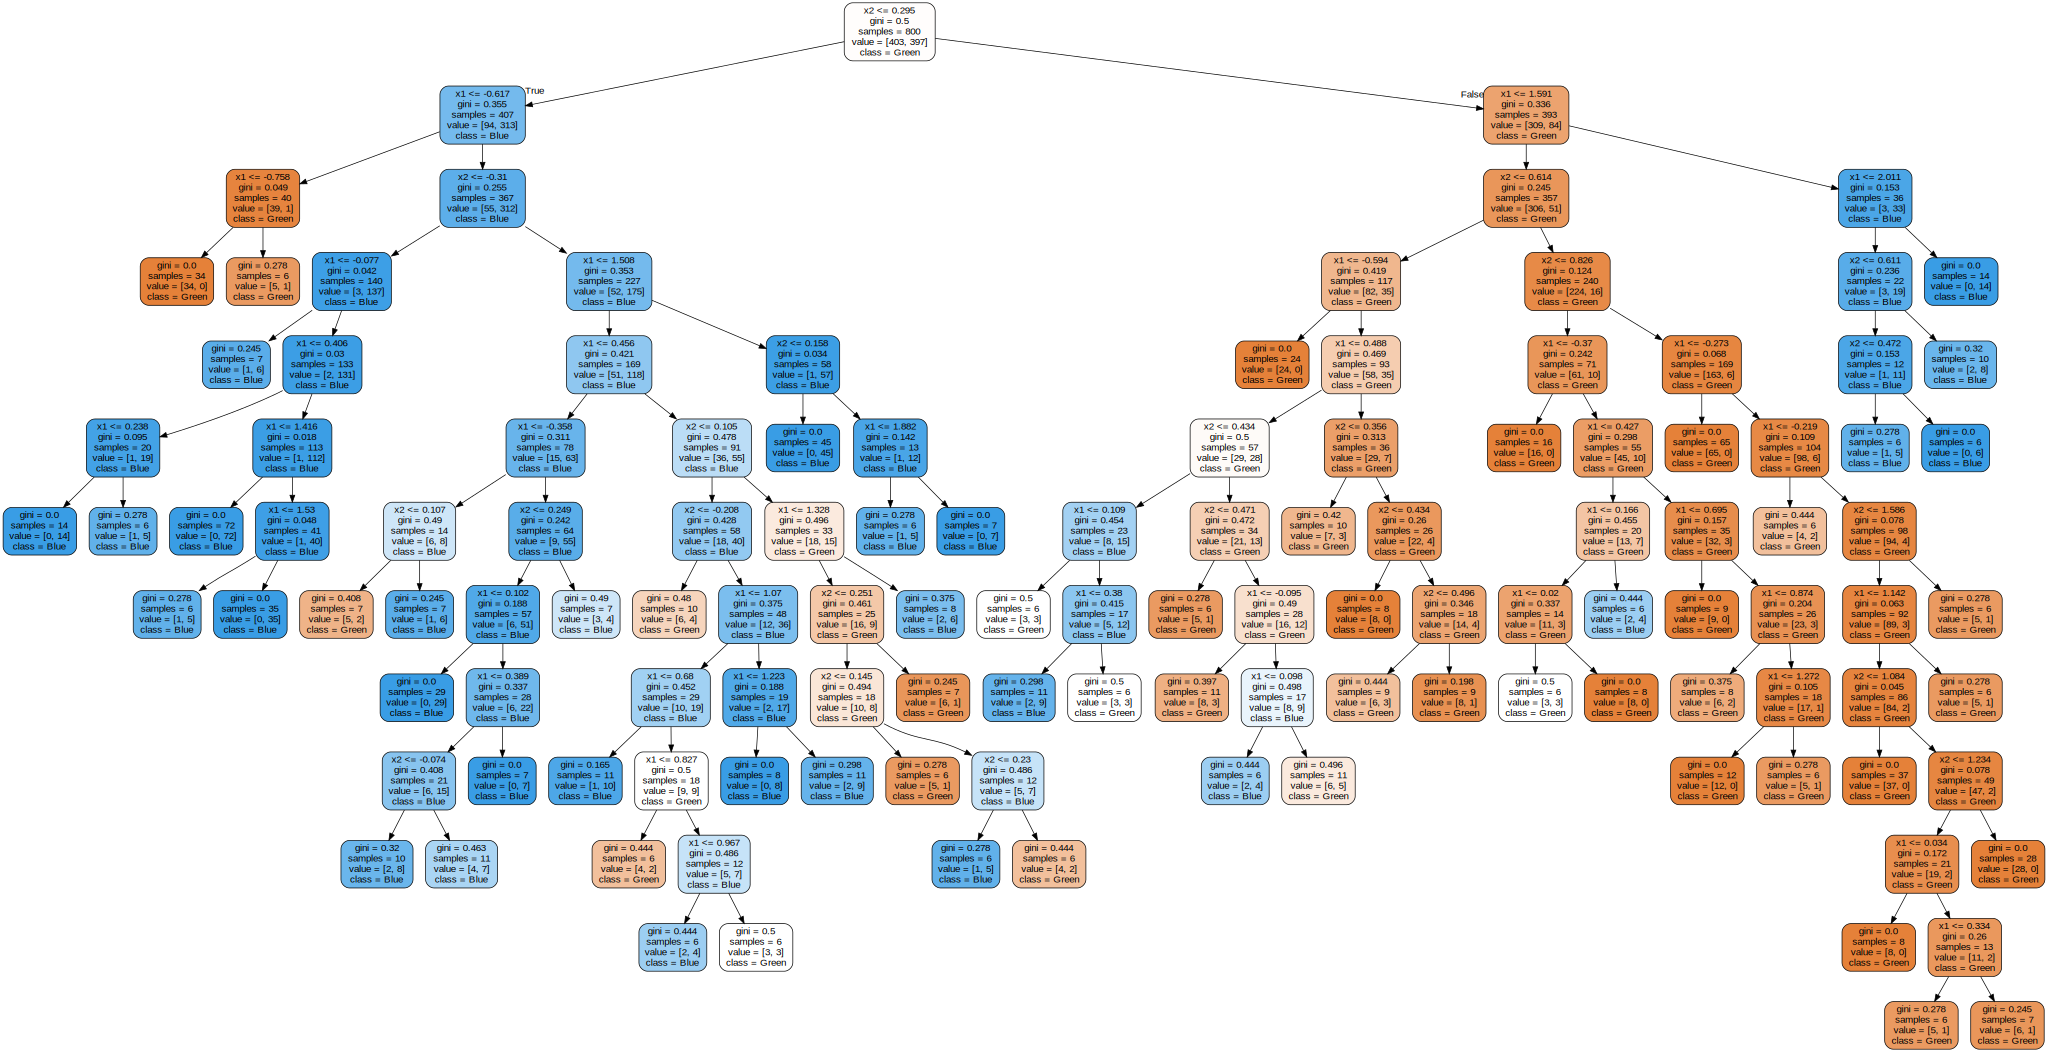

In [63]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(deep_tree_clf,
               out_file=os.path.join(IMAGES_PATH,"moons_tree.dot"),
               feature_names=["x1","x2"],
               class_names=["Green","Blue"],
               rounded=True,
               filled=True)
Source.from_file(os.path.join(IMAGES_PATH,"moons_tree.dot"))

그림 저장: min_samples_leaf_plot


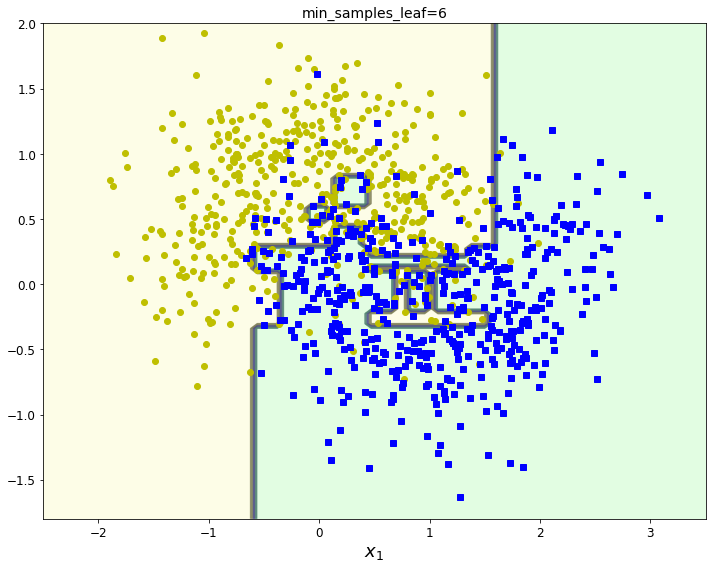

In [68]:
fig, axes=plt.subplots(figsize=(10,8))
plot_decision_boundary(deep_tree_clf,Xm,ym,axes=[-2.5,3.5,-1.8,2],iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf.min_samples_leaf),fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()